# Internet archive 'big data' for 'small histories' 
* Outline of project
* reasoning 
* limitations 


## Importing the data
The first couple of steps will take place outside of this notebook but are fairly straight forward. The first thing we will need to do is to get the data we are going to be working wit. This can be found 


In [226]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import seaborn

In [207]:
wellcome_data = pd.read_table('wellcome-linkage.tsv', names=['year','origin','link','times-linked'], sep='\||\t', engine='python')


In [250]:
wellcome_data

,year,origin,link,times-linked
0,1996,odin.neuro.soton.ac.uk,www.wellcome.ac.uk,1
1,1996,tarantula.wellcome.ac.uk,tarantula.wellcome.ac.uk,24
2,1996,www.ability.org.uk,www.tmr.wellcome.ac.uk,1
3,1996,www.healthindex.co.uk,www.tmr.wellcome.ac.uk,1
4,1997,atuin.chime.ucl.ac.uk,www.wellcome.ac.uk,10
5,1997,back.niss.ac.uk,www.wellcome.ac.uk,1
6,1997,bushmills.mic.dundee.ac.uk,www.wellcome.ac.uk,2
7,1997,com2.uclan.ac.uk,www.wellcome.ac.uk,7
8,1997,epidemic.zoo.ox.ac.uk,www.tmr.wellcome.ac.uk,2
9,1997,garbo.psychol.ucl.ac.uk,www.wellcome.ac.uk,5


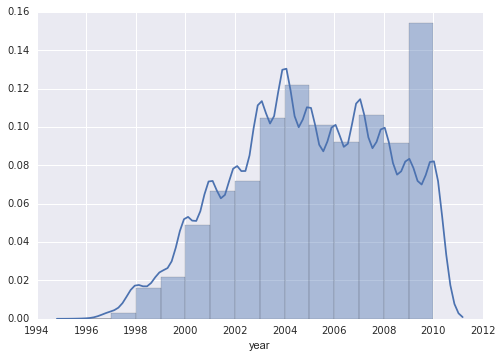

In [232]:
import seaborn
seaborn.distplot(wellcome_data['year'], bins=14)

In [242]:
wellcome_data1996 = wellcome_data[wellcome_data.year ==1996]
wellcome_data2010 = wellcome_data[wellcome_data.year ==2010]

In [249]:
shared_links = []
non_shared_links = []
for link in wellcome_data1996['link']:
    if link in wellcome_data['link']:
        shared_links.append(link)
    else:
        non_shared_links.append(link)
print(shared_links)
print(non_shared_links)

[]
['www.wellcome.ac.uk', 'tarantula.wellcome.ac.uk', 'www.tmr.wellcome.ac.uk', 'www.tmr.wellcome.ac.uk']
